In [217]:
import pandas as pd
# import imputer
from sklearn.impute import SimpleImputer
# import standard scaler
from sklearn.preprocessing import StandardScaler
# import label encoder
from sklearn.preprocessing import LabelEncoder
# import hot encoding
from sklearn.preprocessing import OneHotEncoder
# import train test split
from sklearn.model_selection import train_test_split
# import linear regression
from sklearn.linear_model import LinearRegression
# import r2 score
from sklearn.metrics import r2_score
# import matplotlib for plotting
import matplotlib.pyplot as plt

In [197]:
datasets = pd.read_csv('staffs.csv')
datasets.head(10)

,Name,Age,Gender,Position,Income
0,Person_1,41,Male,Analyst,56605
1,Person_2,46,Female,Intern,36815
2,Person_3,22,Female,Developer,82556
3,Person_4,21,Male,Intern,21402
4,Person_5,36,Male,Developer,82915
5,Person_6,46,Male,Designer,66292
6,Person_7,32,Male,Manager,103608
7,Person_8,56,Male,Manager,120202
8,Person_9,48,Female,Developer,91292
9,Person_10,55,Female,Designer,66823


In [198]:
# title of the csv data
datasets.columns

Index(['Name', 'Age', 'Gender', 'Position', 'Income'], dtype='object')

In [199]:
# remove the Name column
datasets = datasets.drop(['Name'], axis=1)
datasets.head(10)

,Age,Gender,Position,Income
0,41,Male,Analyst,56605
1,46,Female,Intern,36815
2,22,Female,Developer,82556
3,21,Male,Intern,21402
4,36,Male,Developer,82915
5,46,Male,Designer,66292
6,32,Male,Manager,103608
7,56,Male,Manager,120202
8,48,Female,Developer,91292
9,55,Female,Designer,66823


In [200]:
# check if uniqueness in gender
print(datasets['Gender'].unique(), "\n")
print(datasets['Position'].unique())

['Male' 'Female'] 

['Analyst' 'Intern' 'Developer' 'Designer' 'Manager']


In [201]:
datasets['Age'].unique()

array([41, 46, 22, 21, 36, 32, 56, 48, 55, 33, 38, 54, 27, 20, 28, 51, 52,
       23, 53, 25, 30, 45, 37, 35, 44, 58, 42, 34, 29, 40, 47, 50, 31, 60,
       24, 43, 59, 39, 57, 26, 49])

In [202]:
# check null values
print(datasets.isnull().sum())

Age         0
Gender      0
Position    0
Income      0
dtype: int64


In [203]:
imputer = SimpleImputer(strategy='mean')

In [204]:
# replace name in income with mean
datasets['Income'] = imputer.fit_transform(datasets[['Income']])
datasets.head(10)

,Age,Gender,Position,Income
0,41,Male,Analyst,56605.0
1,46,Female,Intern,36815.0
2,22,Female,Developer,82556.0
3,21,Male,Intern,21402.0
4,36,Male,Developer,82915.0
5,46,Male,Designer,66292.0
6,32,Male,Manager,103608.0
7,56,Male,Manager,120202.0
8,48,Female,Developer,91292.0
9,55,Female,Designer,66823.0


In [205]:
# replace the null values in Gender with the most frequent value
gender_most_freq = datasets['Gender'].mode()[0]
print(gender_most_freq)
datasets['Gender'] = datasets['Gender'].fillna(gender_most_freq)

# replace the null values in Position with the most frequent value
position_most_freq = datasets['Position'].mode()[0]
print(position_most_freq)
datasets['Position'] = datasets['Position'].fillna(position_most_freq)
datasets.head(10)

Male
Developer


,Age,Gender,Position,Income
0,41,Male,Analyst,56605.0
1,46,Female,Intern,36815.0
2,22,Female,Developer,82556.0
3,21,Male,Intern,21402.0
4,36,Male,Developer,82915.0
5,46,Male,Designer,66292.0
6,32,Male,Manager,103608.0
7,56,Male,Manager,120202.0
8,48,Female,Developer,91292.0
9,55,Female,Designer,66823.0


In [206]:
# check if null values still exist
print(datasets.isnull().sum())

Age         0
Gender      0
Position    0
Income      0
dtype: int64


In [207]:
# scaler and encoder
scaler = StandardScaler()
encoder = LabelEncoder()
hot_encoder = OneHotEncoder()
# linear regression model
model = LinearRegression()

In [208]:
# Check unique values of Gender
print(datasets['Gender'].unique(), "Unique values of Gender \n")
# Check unique values of Position
print(datasets['Position'].unique(), "Unique values of Position \n")

['Male' 'Female'] Unique values of Gender 

['Analyst' 'Intern' 'Developer' 'Designer' 'Manager'] Unique values of Position 



In [209]:
# Since we have only two unique values in Gender, we can use label encoding
datasets['Gender'] = datasets['Gender'].astype(str)
# encode gender
datasets['Gender'] = encoder.fit_transform(datasets['Gender'])
# print the encoded values for each gender (there corresponding numerical values, in a dictionary format {"male": 0, "female": 1})
mapping = {label: idx for idx, label in enumerate(encoder.classes_)}
print(mapping, "Gender mapping \n")

# We have more than two unique values in Position, so we will use one hot encoding
# encode position
position_encoded = hot_encoder.fit_transform(datasets[['Position']]).toarray()
print(position_encoded, "Position encoded \n")
# create a DataFrame with the encoded position
position_df = pd.DataFrame(position_encoded, columns=hot_encoder.get_feature_names_out(['Position']))
print(position_df.head(10), "Position DataFrame \n")
# concatenate the original DataFrame with the encoded position DataFrame
datasets = pd.concat([datasets, position_df], axis=1)
# drop the original Position column
datasets = datasets.drop(['Position'], axis=1)


{'Female': 0, 'Male': 1} Gender mapping 

[[1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]] Position encoded 

   Position_Analyst  Position_Designer  Position_Developer  Position_Intern  \
0               1.0                0.0                 0.0              0.0   
1               0.0                0.0                 0.0              1.0   
2               0.0                0.0                 1.0              0.0   
3               0.0                0.0                 0.0              1.0   
4               0.0                0.0                 1.0              0.0   
5               0.0                1.0                 0.0              0.0   
6               0.0                0.0                 0.0              0.0   
7               0.0                0.0                 0.0              0.0   
8               0.0                0.0                 1.0              0.0   
9               0.0                

In [210]:
# scale the Age and Income columns
datasets[['Age']] = scaler.fit_transform(datasets[['Age']])
datasets.head(10)

,Age,Gender,Income,Position_Analyst,Position_Designer,Position_Developer,Position_Intern,Position_Manager
0,0.131040,1,56605.0,1.0,0.0,0.0,0.0,0.0
1,0.539689,0,36815.0,0.0,0.0,0.0,1.0,0.0
2,-1.421826,0,82556.0,0.0,0.0,1.0,0.0,0.0
3,-1.503556,1,21402.0,0.0,0.0,0.0,1.0,0.0
4,-0.277609,1,82915.0,0.0,0.0,1.0,0.0,0.0
5,0.539689,1,66292.0,0.0,1.0,0.0,0.0,0.0
6,-0.604528,1,103608.0,0.0,0.0,0.0,0.0,1.0
7,1.356987,1,120202.0,0.0,0.0,0.0,0.0,1.0
8,0.703149,0,91292.0,0.0,0.0,1.0,0.0,0.0
9,1.275257,0,66823.0,0.0,1.0,0.0,0.0,0.0


In [211]:
# x should be age, gender, and position while y should be income
X = datasets[['Age', 'Gender'] + list(position_df.columns)]
y = datasets['Income']
print(X.head(10), "X DataFrame \n")
print(y.head(10), "Y DataFrame \n")

        Age  Gender  Position_Analyst  Position_Designer  Position_Developer  \
0  0.131040       1               1.0                0.0                 0.0   
1  0.539689       0               0.0                0.0                 0.0   
2 -1.421826       0               0.0                0.0                 1.0   
3 -1.503556       1               0.0                0.0                 0.0   
4 -0.277609       1               0.0                0.0                 1.0   
5  0.539689       1               0.0                1.0                 0.0   
6 -0.604528       1               0.0                0.0                 0.0   
7  1.356987       1               0.0                0.0                 0.0   
8  0.703149       0               0.0                0.0                 1.0   
9  1.275257       0               0.0                1.0                 0.0   

   Position_Intern  Position_Manager  
0              0.0               0.0  
1              1.0               0.0  
2 

In [212]:
# logo out the length of the X and y DataFrames
print(len(X), "Length of X DataFrame \n")
print(len(y), "Length of Y DataFrame \n")

300 Length of X DataFrame 

300 Length of Y DataFrame 



In [213]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [214]:
# train the linear regression model
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [215]:
y_pred = model.predict(X_test)
print(y_pred, "Predicted Income \n")

[ 76814.78945563  60620.60203751  81195.28761427  76765.72178341
  25627.44911739  86452.65602515  79894.64903958  96514.29091713
  72434.29129698  66301.73877084  85201.08512268  62421.72407722
  97716.79414738  63624.22730747  92084.72508627  57540.74245355
  67378.94001488  75062.73508814  62547.02606343  68053.79313834
  61872.17293998 102582.74189601  71258.95470851  30682.80039949
  98202.24373737  28805.44404579 110767.02043429  45701.65122914
  75514.15088094  31885.30362974  56789.6550161   93962.08143997
  23124.30731245  78992.29828255  78317.44515909  66301.73877084
 120779.58765405  78317.44515909  74262.57997847  74937.43310192
  83372.79644119  83949.51422021 116975.80727442  42572.72397296
  56789.6550161   55037.60064861  63798.5969659   79618.08373378
  92759.57820972  99594.15050109  77440.57490686  60043.88425849
  73762.09651345  75013.66741592  60043.88425849  67428.0076871
  88379.08005107  74888.3654297   78017.29268588  97765.8618196 ] Predicted Income 



In [216]:
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

R² Score: 0.9041568568657226


# Visualize the results

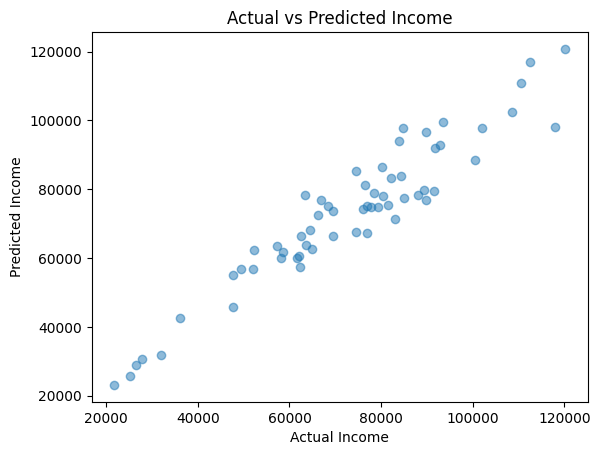

In [218]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Income")
plt.ylabel("Predicted Income")
plt.title("Actual vs Predicted Income")
plt.show()